In [1]:
# cols not in db starting 2020 so removed
#cols_not_needed = ["tripduration","gender","birthyear"]
col_to_use =["trip_id", "bikeid", "start_time" , "end_time",
           "from_station_name", "from_station_id",
           "to_station_name","to_station_id", "usertype"]
col_names = ["ride_id" ,"rideable_type" ,"started_at" ,
        "ended_at" ,"start_station_name","start_station_id" ,
        "end_station_name" ,"end_station_id" ,"member_casual"]
col_to_use_2019Q2 = [
        "01 - Rental Details Rental ID"
        ,"01 - Rental Details Bike ID"                    
        ,"01 - Rental Details Local Start Time"            
        ,"01 - Rental Details Local End Time"
        ,"03 - Rental Start Station Name"   
        ,"03 - Rental Start Station ID"                    
        ,"02 - Rental End Station Name"                
        ,"02 - Rental End Station ID"                      
        ,"User Type"                                       
    ]

In [2]:
import pandas as pd
df1 = pd.read_csv("Divvy_Trips_2020_Q1.csv",usecols=col_names)[col_names]
df2 = pd.read_csv("Divvy_Trips_2019_Q2.csv",usecols=col_to_use_2019Q2)[col_to_use_2019Q2]

df3 = pd.read_csv("Divvy_Trips_2019_Q3.csv",usecols=col_to_use)[col_to_use]

df4 = pd.read_csv("Divvy_Trips_2019_Q4.csv",usecols=col_to_use)[col_to_use]

In [3]:
# change col name to make it easy to append
df2.columns = col_names
df3.columns = col_names
df4.columns = col_names

In [4]:
# change some col type
change_col_dtype = ["ride_id", "rideable_type"]
df2[change_col_dtype] = df2[change_col_dtype].astype(object)
df3[change_col_dtype] = df3[change_col_dtype].astype(object)
df4[change_col_dtype] = df4[change_col_dtype].astype(object)
#df1["end_station_id"] = df1["end_station_id"].astype(int)

In [5]:
# append 4 diff quarter data to one
df = pd.concat([df1, df2, df3, df4])

In [6]:
# only subscriber to member, customer to casual
df['member_casual'] = df['member_casual'].replace(["Subscriber", "Customer"], ["member", "casual"])

In [7]:
# convert star and end time to datetime
df['started_at'] = pd.to_datetime(df["started_at"])
df['ended_at'] = pd.to_datetime(df["ended_at"])
# Ride Lenght in minutes end-start
df['ride_length'] = (df['ended_at'] - df['started_at']).dt.components.minutes

In [8]:
#calculate some more measures
df['date'] = pd.to_datetime(df["started_at" ])
df['Year'] = df['date'].dt.year
df['Month'] =df['date'].dt.month
df['Day'] =df['date'].dt.day
df['Day_Of_week'] = df['date'].dt.day_name()

In [9]:
# to save the df 
#df.to_csv('all_trip_final.csv')

In [10]:
res = df.pivot_table(index = 'Day_Of_week', columns='member_casual',values='ride_length')
res

member_casual,casual,member
Day_Of_week,,
Friday,23.118138,11.533927
Monday,23.281143,11.619158
Saturday,24.665076,13.033995
Sunday,24.454691,13.053759
Thursday,22.509410,11.643515
Tuesday,22.533057,11.616928
Wednesday,22.380152,11.663698


Text(0.5, 0, 'AVG Ride Duration (mins)')

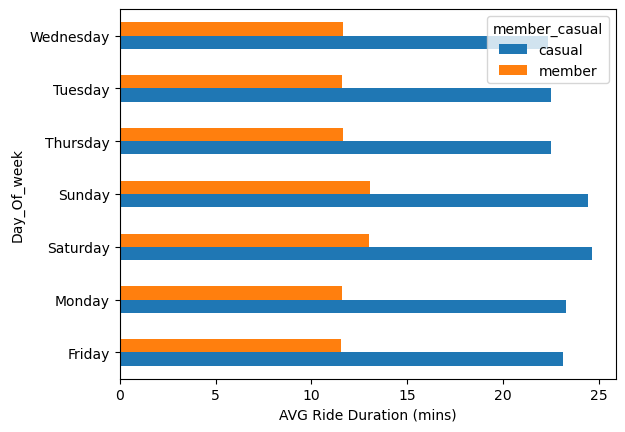

In [11]:
import matplotlib.pyplot as plt
ax = res.plot(kind='barh')
ax.set_xlabel("AVG Ride Duration (mins)")

Text(0, 0.5, 'Avg ride duration (mins)')

<Figure size 640x480 with 0 Axes>

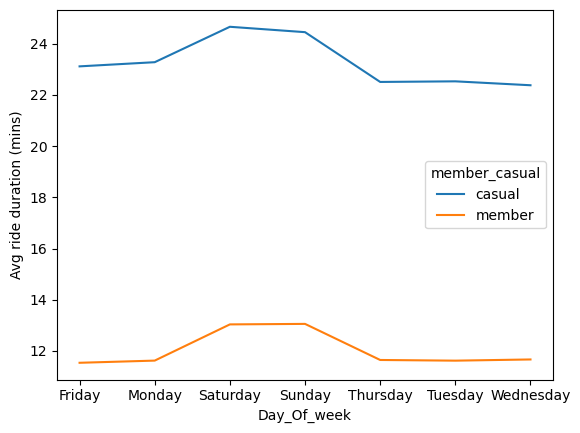

In [12]:
plt.figure()
res.plot.line()
plt.ylabel("Avg ride duration (mins)")